# Análise SELIC

In [28]:
import requests

In [29]:
BASE_URL = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json&dataInicial=01/01/1990&dataFinal=31/12/2021'

def download_selic_file(filename: str):
    with open(filename, 'w') as file:
        resp = requests.get(BASE_URL)
        file.write(resp.text)
        file.write('\n')

In [30]:
download_selic_file('arquivo_selic.json')

In [31]:
with open('arquivo_selic.json', 'r') as file:
    print(file.read())

[{"data":"29/12/1989","valor":"2.793452"},{"data":"02/01/1990","valor":"2.679178"},{"data":"03/01/1990","valor":"2.677644"},{"data":"04/01/1990","valor":"2.272630"},{"data":"05/01/1990","valor":"2.275452"},{"data":"08/01/1990","valor":"2.276932"},{"data":"09/01/1990","valor":"2.275644"},{"data":"10/01/1990","valor":"2.270137"},{"data":"11/01/1990","valor":"2.276959"},{"data":"12/01/1990","valor":"2.297260"},{"data":"15/01/1990","valor":"2.330329"},{"data":"16/01/1990","valor":"2.136493"},{"data":"17/01/1990","valor":"2.136137"},{"data":"18/01/1990","valor":"2.141589"},{"data":"19/01/1990","valor":"2.163014"},{"data":"22/01/1990","valor":"2.274000"},{"data":"23/01/1990","valor":"2.328333"},{"data":"24/01/1990","valor":"2.396667"},{"data":"25/01/1990","valor":"2.468333"},{"data":"26/01/1990","valor":"2.535667"},{"data":"29/01/1990","valor":"2.602333"},{"data":"30/01/1990","valor":"2.671667"},{"data":"31/01/1990","valor":"2.767667"},{"data":"01/02/1990","valor":"2.921333"},{"data":"02/02/

In [32]:
import pandas as pd

df = pd.read_json('arquivo_selic.json')
df["data"] = pd.to_datetime(df["data"], format="%d/%m/%Y")

print(df)

           data     valor
0    1989-12-29  2.793452
1    1990-01-02  2.679178
2    1990-01-03  2.677644
3    1990-01-04  2.272630
4    1990-01-05  2.275452
...         ...       ...
8020 2021-12-27  0.034749
8021 2021-12-28  0.034749
8022 2021-12-29  0.034749
8023 2021-12-30  0.034749
8024 2021-12-31  0.034749

[8025 rows x 2 columns]


<AxesSubplot:xlabel='data'>

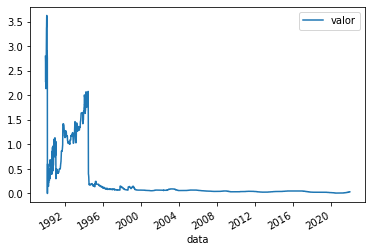

In [33]:
df.plot(x="data", y="valor")

           data     valor
1496 1996-01-02  0.120000
1497 1996-01-03  0.119667
1498 1996-01-04  0.114667
1499 1996-01-05  0.113667
1500 1996-01-08  0.113667
...         ...       ...
8020 2021-12-27  0.034749
8021 2021-12-28  0.034749
8022 2021-12-29  0.034749
8023 2021-12-30  0.034749
8024 2021-12-31  0.034749

[6529 rows x 2 columns]


<AxesSubplot:xlabel='data'>

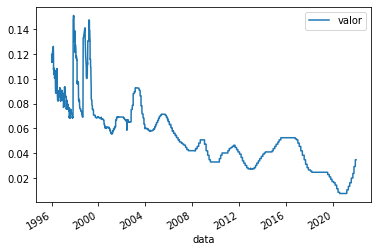

In [34]:
from datetime import datetime

new_df = df[df["data"] >= datetime(1996,1,1)]

print(new_df)
new_df.plot(x="data", y="valor")

In [35]:
def get_trend_reversal(df):
    trend_reversal_dates = []

    for i in range(1, len(df.index)):
        if df.loc[i, "valor"] - df.loc[i-1, "valor"] > 0:
            df.loc[i, "trend"] = 1
        else:
            df.loc[i, "trend"] = -1

        if df.loc[i, "trend"] != df.loc[i-1, "trend"]:
            trend_reversal_dates.append(df.loc[i, "data"])

    return trend_reversal_dates

trend_reversal_dates = get_trend_reversal(df)

new_df = df[df["data"].isin(trend_reversal_dates)]
print(new_df)


           data     valor  trend
1    1990-01-02  2.679178   -1.0
4    1990-01-05  2.275452    1.0
6    1990-01-09  2.275644   -1.0
8    1990-01-11  2.276959    1.0
11   1990-01-16  2.136493   -1.0
...         ...       ...    ...
7957 2021-09-24  0.023687   -1.0
7980 2021-10-28  0.029256    1.0
7981 2021-10-29  0.029256   -1.0
8008 2021-12-09  0.034749    1.0
8009 2021-12-10  0.034749   -1.0

[1445 rows x 3 columns]
